In [8]:
from dataclasses import dataclass
import pandas as pd
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

data = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

In [ ]:
data.head()


In [ ]:
data.age_cut = pd.cut(data.age, bins=9, labels=[20,30,40,50,60,70,80,90,100])

In [ ]:
data.age_cut.value_counts()

In [45]:
target = (data.y == 'yes')
raw_features = data.drop(['y', 'age', 'pdays'],axis=1)
features = pd.get_dummies(raw_features)

In [ ]:
features.head()

In [46]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=.20,train_size=.80,random_state=1000)

In [47]:
oversample = RandomOverSampler(sampling_strategy='minority')

X_train, y_train = oversample.fit_resample(X_train, y_train)

In [48]:
from pandas.core.common import random_state
classifier_RF = RandomForestClassifier(n_estimators=200,max_depth=150,random_state=20000, min_weight_fraction_leaf=.0003)

classifier_RF.fit(X_train,y_train)

y_predicted_RF = classifier_RF.predict(X_test)
#test accuracy
metrics.accuracy_score(y_test, y_predicted_RF)


0.8435299830055839

In [49]:
print(metrics.classification_report(y_test,y_predicted_RF))

              precision    recall  f1-score   support

       False       0.95      0.87      0.91      7320
        True       0.38      0.63      0.47       918

    accuracy                           0.84      8238
   macro avg       0.66      0.75      0.69      8238
weighted avg       0.89      0.84      0.86      8238



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


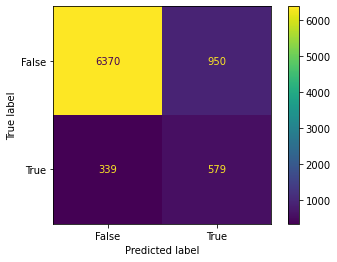

In [50]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
confusion = plot_confusion_matrix(classifier_RF,X_test,y_test)

In [51]:
feature_df = pd.DataFrame(

    {'features': features.columns, 'importance': classifier_RF.feature_importances_})

feature_df.sort_values('importance', ascending=False)

,features,importance
5,euribor3m,0.175150
6,nr.employed,0.139305
2,emp.var.rate,0.104240
4,cons.conf.idx,0.064348
3,cons.price.idx,0.042111
0,campaign,0.041271
59,poutcome_success,0.040729
1,previous,0.025044
58,poutcome_nonexistent,0.020880
48,month_may,0.018906


In [ ]:
important_data = 